In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy

In [10]:
wave_file = 'jily.wav'
wvf = wave.open(wave_file)
wvf.rewind()
signal = wvf.readframes(-1)
signal = np.frombuffer(signal, np.int16)
fs = wvf.getframerate()
n = wvf.getnchannels()

In [11]:
channels=np.reshape(signal, (int(len(signal)/n),n), order="A")

In [14]:
Time=np.linspace(0, len(signal)/n/fs, num=int(len(signal)/n))

In [15]:
Time[-1]

1.5565986394557823

In [17]:
channel = channels[:,1]

In [18]:
max_x = 100
max_y = 50
scale_x = max_x/Time[-1]
scale_y = max_y/np.max(np.abs(channel))

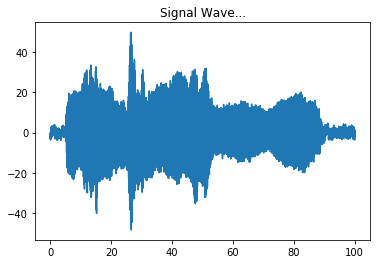

In [19]:
#Plot
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time*scale_x,channel*scale_y)
plt.show()

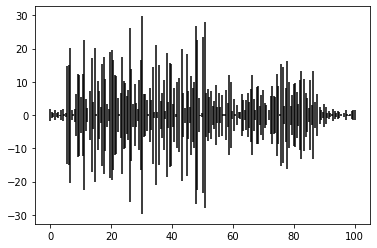

In [47]:
max_x = 100
max_y = 50
scale_x = max_x/Time[-1]
scale_y = max_y/np.max(np.abs(channel))

plot_lines_x = np.linspace(0, max_x, 200)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channel*scale_y)
for idx, line in enumerate(np.abs(plot_lines_y)):
    plt.vlines(plot_lines_x[idx], -line, line)

In [48]:
np.arange?

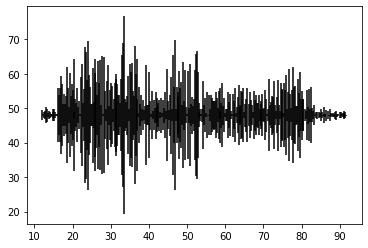

In [21]:
x_offset=12
y_offset=96/2

max_x = 80
max_y = 80
scale_x = max_x/Time[-1]
scale_y = (max_y/2)/np.max(np.abs(channel))

plot_lines_x = np.arange(0, max_x, 0.25)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channel*scale_y)
for idx, line in enumerate(np.abs(plot_lines_y)):
    plt.vlines(x_offset+plot_lines_x[idx], -line+y_offset, line+y_offset)

In [23]:
import gcode

ModuleNotFoundError: No module named 'gcode'

In [36]:
prog = gcode.GCode()
for n in range(10):
    prog.G0(X=n)

In [37]:
prog

<GCode>[cmds=10]

In [40]:
plot_lines_x[0]

0.0

In [38]:
prog = gcode.GCode()
for X, Y in zip(plot_lines_x, np.abs(plot_lines_y)):
    prog.G0(X=X, Y=-Y)
    prog.M4(S=150)
    prog.G1(X=X, Y=-Y)
    prog.G1(X=X, Y=Y)
    prog.M5()

In [39]:
prog

<GCode>[cmds=1000]

In [ ]:
prog = gcode.GCode()
for idx, Y in enumerate(np.abs(plot_lines_y)):
    X=plot_lines_x[idx]
    prog.G0(X=X, Y=-Y)
    prog.M4(S=150)
    prog.G1(X=X, Y=-Y)
    prog.G1(X=X, Y=Y)
    prog.M5()